In [2]:
from cluster_pipeline import pipeline

/Users/tylersoong/projects/math373/clusteringhw/cluster_pipeline.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['kmeans'] = k_model.labels_
/Users/tylersoong/projects/math373/clusteringhw/cluster_pipeline.py:24: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['kmedoids'] = km_model.labels_
/Users/tylersoong/projects/math373/clusteringhw/cluster_pipeline.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joini

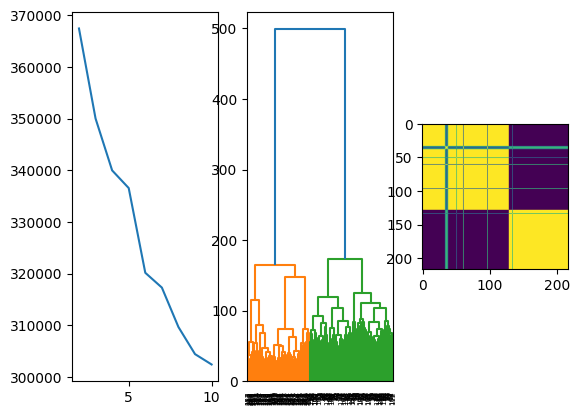

In [17]:
import pandas as pd
import numpy as np

df = pd.read_csv('TCGA_example.txt',sep=" ")
train_df = df.drop("Subtype", axis=1)
train_df = train_df.sample(n=1500, axis=1)

results = pipeline(train_df, 2)



In [18]:
truth = (df['Subtype'] == 'Basal').astype(int)

#since there are two categories, if the number is really low simply flip it around
for method in ['kmeans', 'kmedoids', 'hierarchal']:
    score = np.mean(results[method] == truth)
    if score < .5:
        print(f"{method}: {1-score}")
    else:
        print(f"{method}: {score}")

kmeans: 0.967741935483871
kmedoids: 0.9907834101382489
hierarchal: 0.9723502304147466
